In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn

## This notebook includes the implementation of a simple MLP with pytorch and manually.

In [9]:
# Loading the data
#data = pd.read_csv('RegressionData.txt', header=None, sep = ' ')
#data.columns=['x','y']
X = np.array([0.5503, 0.9206, 0.5359, 0.6081, 0.0202, 0.8545, 0.2357, 0.4847, 0.3996, 0.1957])[:,None]
y = np.array([-0.5894,-0.2507 ,-0.0468 ,-0.3402  ,0.2857 ,-1.0683  ,0.8605 ,-0.0801  ,0.6837, 1.185 ])[:,None]
X = torch.tensor(X,dtype = torch.float)
y = torch.tensor(y,dtype = torch.float)

## Manual implementation of an MLP

In [10]:
class MLP_reg:
    def __init__(self):
        self.w_21 = np.random.uniform(-0.5, 0.5, size = (4,1))
        self.w_10 = np.random.uniform(-0.5, 0.5, size = (2,3))
        self.w_21_d = np.zeros_like(self.w_21)
        self.w_10_d = np.zeros_like(self.w_10)
    def forward(self, x): 
        #print('x',x)
        self.h_0 = np.array([[1],[x]])
        #print('h_0',self.h_0)
        self.h_1_no_bias = (self.h_0.T@self.w_10).T # Without bias
        #print('h_1_no_bias',self.h_1_no_bias) # Works
        self.s_1 = np.insert(np.tanh(self.h_1_no_bias),0,1)[:,None] # Works
        #print('s_1',self.s_1)
        self.h_2 = self.w_21.T@self.s_1
        #print('h_2',self.h_2)
        self.s_2 = self.h_2
        #print('s_2',self.s_2)
        
        return self.s_2[0]
                
    def gradient_update(self,x,y):
        #y_pred = np.vectorize(self.forward())(y)
        #print(x,'X')
        #print(y,'y')
        #print('\n\nGradient Update')
        y_pred = self.forward(x) # works
        ae = y_pred - y 
        #print('y_True:',y)
        #print('y_Pred:',y_pred)
        #print('ae',ae)
        self.d_1  =  (1 - (np.tanh(self.h_1_no_bias))**2) * (self.w_21[1:]) # works
        #print('d_1',self.d_1)
        self.w_21_d +=  ae * self.s_1
        self.w_10_d +=  ae * self.h_0@self.d_1.T
        #print('w_10_d',self.w_10_d)
        #print('w_21_d',self.w_21_d)
        #print(np.sum(self.w_10_d),'Sum')
        
    def fit(self,X,y,delta=0.4):
        epoch = 0
        e = 1000
        while e>=10**-5 and epoch <= 3000:
            
            self.w_21_d = np.zeros_like(self.w_21)
            self.w_10_d = np.zeros_like(self.w_10)
            #print('w_21',self.w_21)
            #print('w_10',self.w_10)
            np.vectorize(self.gradient_update,cache=True)(X,y)
            #print('d_1',self.d_1)
            self.w_21 -= delta * (0.1) * self.w_21_d
            self.w_10 -= delta * (0.1) * self.w_10_d
            
            #print('Update_w_21:',self.w_21)
            #print('Update_w_10:',self.w_10)
            e = np.mean(np.vectorize(self.mse_error,cache=True)(X,y))
            if (epoch % 100) == 0:
                print(f'Error at epoch {epoch}:', round(e,3))
           
            epoch +=1
        

       
    def mse_error(self,x,y):
        self.mse = 0.5 * ((self.forward(x)-y)**2)
        return self.mse

In [11]:
mlp = MLP_reg()
mlp.fit(X,y)

Error at epoch 0: 0.244
Error at epoch 100: 0.091
Error at epoch 200: 0.09
Error at epoch 300: 0.09
Error at epoch 400: 0.089
Error at epoch 500: 0.088
Error at epoch 600: 0.086
Error at epoch 700: 0.085
Error at epoch 800: 0.082
Error at epoch 900: 0.078
Error at epoch 1000: 0.075
Error at epoch 1100: 0.07
Error at epoch 1200: 0.065
Error at epoch 1300: 0.059
Error at epoch 1400: 0.052
Error at epoch 1500: 0.044
Error at epoch 1600: 0.038
Error at epoch 1700: 0.034
Error at epoch 1800: 0.031
Error at epoch 1900: 0.03
Error at epoch 2000: 0.029
Error at epoch 2100: 0.028
Error at epoch 2200: 0.028
Error at epoch 2300: 0.028
Error at epoch 2400: 0.028
Error at epoch 2500: 0.028
Error at epoch 2600: 0.028
Error at epoch 2700: 0.028
Error at epoch 2800: 0.028
Error at epoch 2900: 0.028
Error at epoch 3000: 0.028


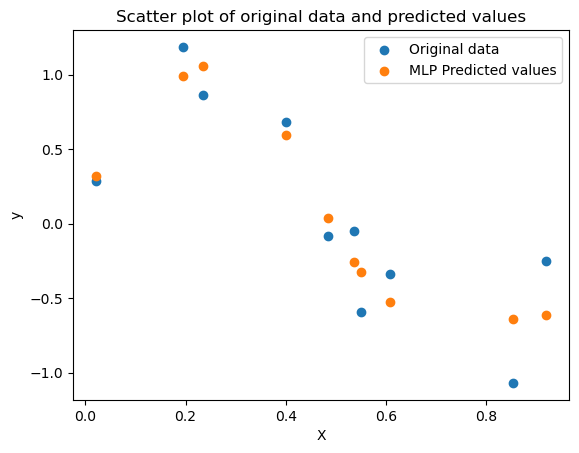

In [12]:
%matplotlib inline

plt.scatter(X, y, label='Original data')
plt.scatter(X, np.vectorize(mlp.forward)(X), label='MLP Predicted values')
plt.title('Scatter plot of original data and predicted values')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## MLP implementation using Pytorch

In [13]:
# Pytorch
class neural_network(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(1,3)
        self.layer2 = torch.nn.Tanh()
        self.layer3 = torch.nn.Linear(3,1)
        
        self.layer1.weight.data = torch.Tensor(3,1).uniform_(-0.5,0.5)
        self.layer1.bias.data =  torch.Tensor(1,3).uniform_(-0.5,0.5)
        self.layer3.weight.data =  torch.Tensor(1,3).uniform_(-0.5,0.5)
        self.layer3.bias.data = torch.Tensor(1).uniform_(-0.5,0.5)
        
    def forward(self,x): # works
        self.out_layer1 = self.layer1(x)
        self.out_layer2 = self.layer2(self.out_layer1)
        self.y_pred = self.layer3(self.out_layer2)
        return self.y_pred

In [14]:
model = neural_network()

criterion = torch.nn.MSELoss()
lr = 0.5
for epoch in range(5000):
    model.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred,y)
    if (epoch % 100) ==0: 
        print(f'Error at epoch {epoch}:', np.round(loss.data.numpy(),3))

    loss.backward()

    for name, param in model.named_parameters():
        #print('\n\n Before:')
        #print('\nName:\n',name)
        #print('Param:\n',param)
        #print('Gradient:\n',param.grad)
        with torch.no_grad():
            param -= lr * param.grad
            #print('\n\n After:')
            #print('\nName:\n',name)
            #print('Param:\n',param)
            #print('Gradient:\n',param.grad)

Error at epoch 0: 0.518
Error at epoch 100: 0.173
Error at epoch 200: 0.163
Error at epoch 300: 0.146
Error at epoch 400: 0.125
Error at epoch 500: 0.11
Error at epoch 600: 0.097
Error at epoch 700: 0.088
Error at epoch 800: 0.077
Error at epoch 900: 0.067
Error at epoch 1000: 0.188
Error at epoch 1100: 0.115
Error at epoch 1200: 0.115
Error at epoch 1300: 0.106
Error at epoch 1400: 0.097
Error at epoch 1500: 0.091
Error at epoch 1600: 0.086
Error at epoch 1700: 0.083
Error at epoch 1800: 0.082
Error at epoch 1900: 0.08
Error at epoch 2000: 0.08
Error at epoch 2100: 0.079
Error at epoch 2200: 0.079
Error at epoch 2300: 0.078
Error at epoch 2400: 0.078
Error at epoch 2500: 0.078
Error at epoch 2600: 0.077
Error at epoch 2700: 0.077
Error at epoch 2800: 0.077
Error at epoch 2900: 0.077
Error at epoch 3000: 0.077
Error at epoch 3100: 0.077
Error at epoch 3200: 0.076
Error at epoch 3300: 0.076
Error at epoch 3400: 0.076
Error at epoch 3500: 0.076
Error at epoch 3600: 0.076
Error at epoch 3

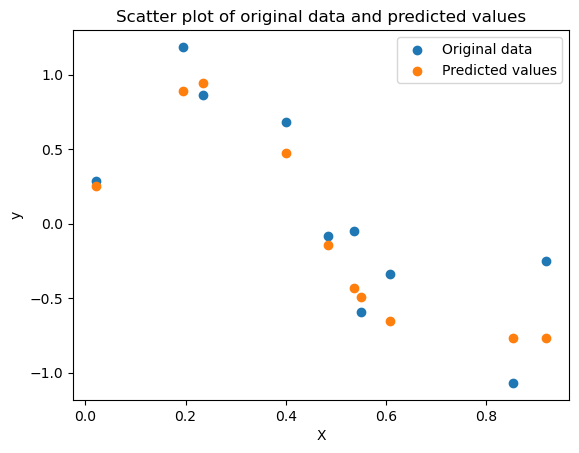

In [15]:
%matplotlib inline

plt.scatter(X.numpy(), y.numpy(), label='Original data')
plt.scatter(X.numpy(), model(X).detach().numpy(), label='Predicted values')
plt.title('Scatter plot of original data and predicted values')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()